In [20]:
import keras
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
with open('OpenPoseV2.json') as f:
  file = json.load(f)

In [22]:
data = file['data']
x_train =[]
y_train = []

def labelToNumerical(label):
    if label == 'WarriorPoseI':
        return 0
    if label == 'WarriorPoseII':
        return 1
    if label == 'WarriorPoseIII':
        return 2
    if label == 'TreePose':
        return 3

i = 0
for i in range(len(data)):
    kpsArr = []
    labels = []
    for kps in data[i]['xs'].items():
        print
        kpsArr.append(kps[1])
    for label in data[i]['ys'].items():
        labels.append(labelToNumerical(label[1]))
    x_train.append(kpsArr)
    y_train.append(labels)
    

In [23]:
print(x_train[0])
x_train = np.asarray(x_train)
print(x_train.shape)
print(x_train[0])

[446.025, 116.66666666666667, 446.025, 157.5, 438.2, 169.16666666666666, 446.025, 215.83333333333334, 0, 0, 453.85, 151.66666666666666, 469.5, 93.33333333333333, 485.15, 64.16666666666667, 438.2, 221.66666666666666, 391.25, 250.83333333333334, 399.075, 320.8333333333333, 461.675, 215.83333333333334, 500.8, 256.6666666666667, 563.4, 297.5, 446.025, 116.66666666666667, 453.85, 116.66666666666667, 0, 0, 0, 0]
(1295, 36)
[446.025      116.66666667 446.025      157.5        438.2
 169.16666667 446.025      215.83333333   0.           0.
 453.85       151.66666667 469.5         93.33333333 485.15
  64.16666667 438.2        221.66666667 391.25       250.83333333
 399.075      320.83333333 461.675      215.83333333 500.8
 256.66666667 563.4        297.5        446.025      116.66666667
 453.85       116.66666667   0.           0.           0.
   0.        ]


In [24]:
print(y_train[0])
y_train = np.asarray(y_train)
print(y_train.shape)
print(y_train)

[0]
(1295, 1)
[[0]
 [0]
 [0]
 ...
 [3]
 [3]
 [3]]


In [25]:
y_cat_train = to_categorical(y_train,4)

In [26]:
y_cat_train[0]

array([1., 0., 0., 0.], dtype=float32)

# Building the model

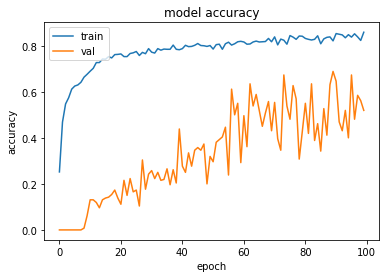

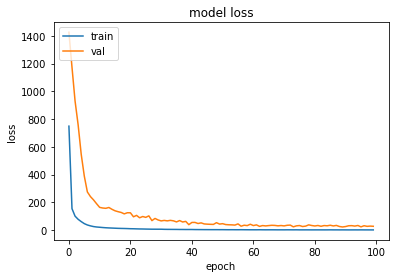

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

model = Sequential()

model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))

optimizer = keras.optimizers.Adam(learning_rate=0.02)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(x_train, y_cat_train, validation_split=0.2, verbose=0, epochs=100)

# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [18]:
model.save('OpenPose_Keras.h5')